In [1]:
from __future__ import division
%matplotlib inline

import numpy as np
import pandas as pd
from copy import copy
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.utils import shuffle

# tableu10 = {'red': np.array([214, 39, 40])/255, 'green': np.array([44, 160, 44])/255, 'blue': np.array([31, 119, 180])/255, 'orange': np.array([255, 127, 14])/255, 'purple': np.array([148, 103, 189])/255}
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [2]:
data_train = pd.DataFrame.from_csv('train.csv')
data_test = pd.DataFrame.from_csv('test.csv')

In [3]:
print(data_train.shape)
display(data_train.head())
print(data_train.describe())
print(data_train.isnull().sum())

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [4]:
data_train_X = copy(data_train.ix[: ,1:])
data_train_y = copy(data_train['Survived'])

In [5]:
data_train['Age'].fillna(data_train['Age'].median(), inplace=True)

In [6]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


female    233
male      109
Name: Sex, dtype: int64


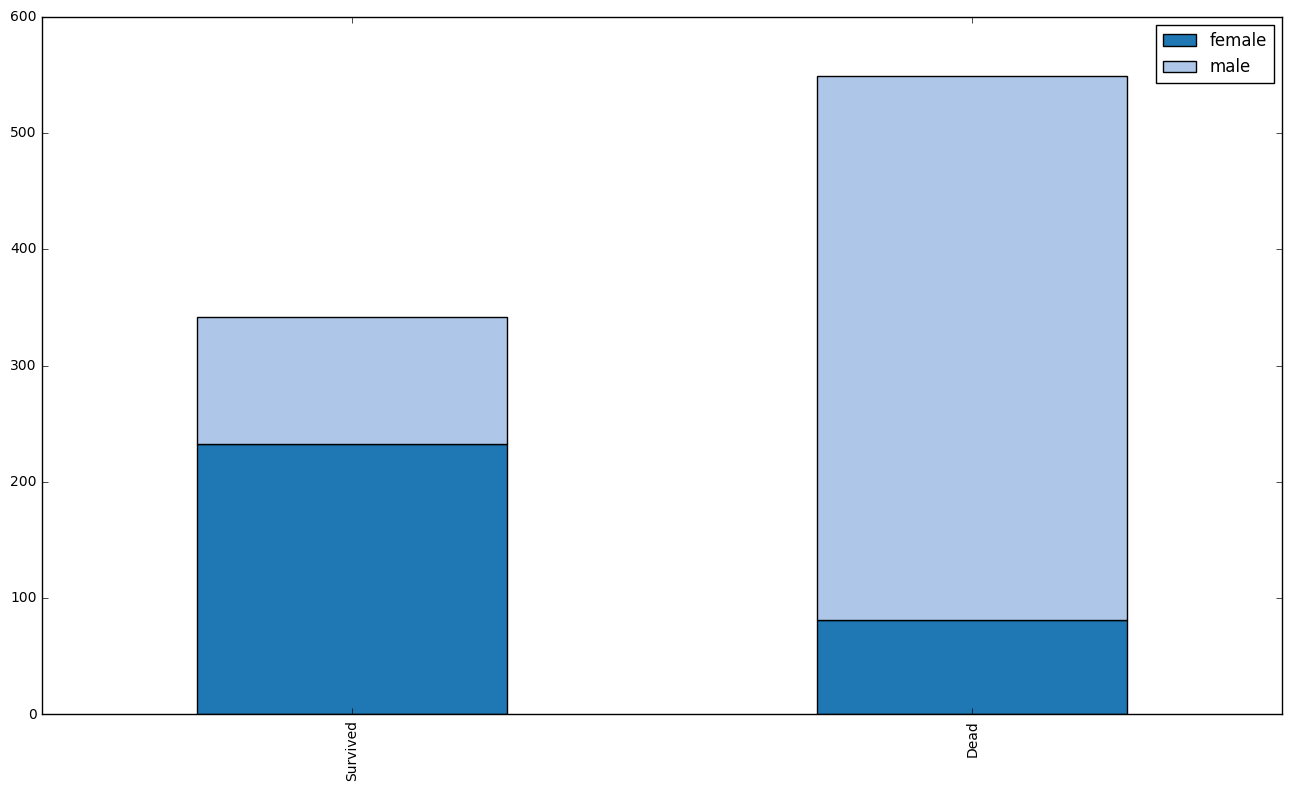

In [7]:
survived_sex = data_train[data_train['Survived']==1]['Sex'].value_counts()
dead_sex = data_train[data_train['Survived']==0]['Sex'].value_counts()
print(survived_sex)
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, color=tableau20, figsize=(16, 9))

Women are more likely to survive.

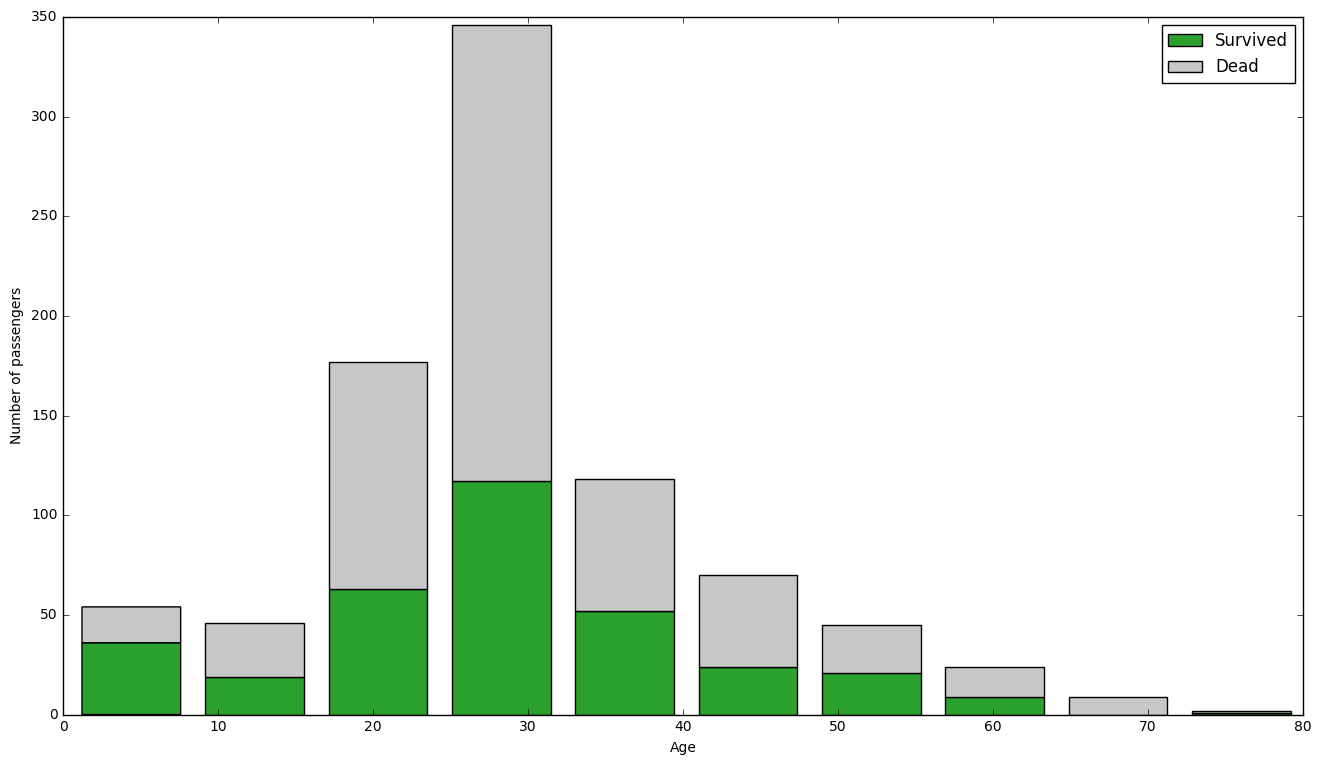

In [8]:
figure = plt.figure(figsize=(16, 9))
plt.hist([data_train[data_train['Survived'] == 1]['Age'], data_train[data_train['Survived'] == 0]['Age']], stacked=True, color = [tableau20[4],tableau20[15]], bins=10, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Anyone less than 10 is more likely to survive.

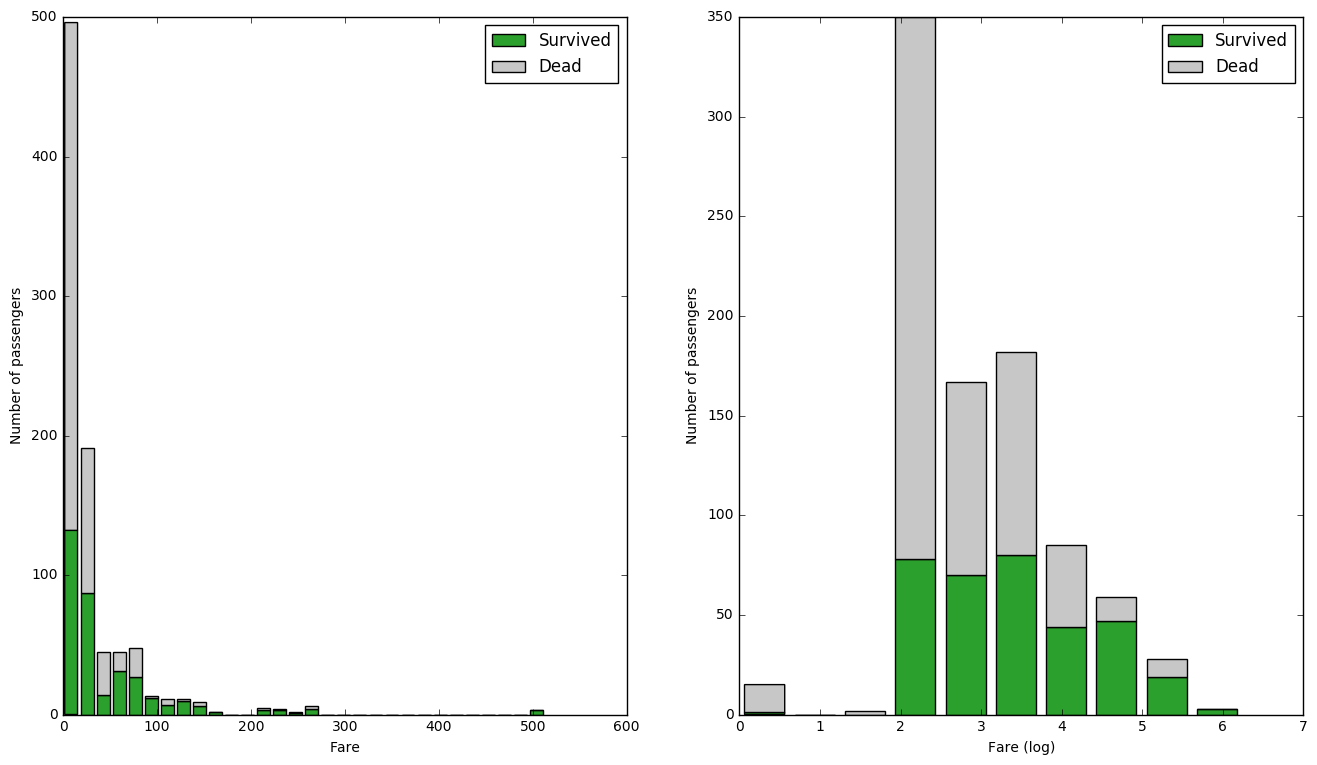

In [9]:
def sign_log_transform(df):
    return np.sign(df) * np.log(np.abs(df) + 1)

def inverse_percentile(arr, num):
    arr = sorted(arr)
    i_arr = [i for i, x in enumerate(arr) if x > num]
   
    return i_arr[0] / len(arr) if len(i_arr) > 0 else 1 

fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(121)
plt.hist([data_train[data_train['Survived'] == 1]['Fare'], data_train[data_train['Survived'] == 0]['Fare']], stacked=True, color=[tableau20[4], tableau20[15]], bins=30, label = ['Survived','Dead'])
# plt.hist([sign_log_transform(data_train[data_train['Survived'] == 1]['Fare']), sign_log_transform(data_train[data_train['Survived'] == 0]['Fare'])], stacked=True, color=[tableau20[10], tableau20[17]], label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

ax2 = fig.add_subplot(122)
plt.hist([sign_log_transform(data_train[data_train['Survived'] == 1]['Fare']), sign_log_transform(data_train[data_train['Survived'] == 0]['Fare'])], stacked=True, color=[tableau20[4], tableau20[15]], label = ['Survived','Dead'])
plt.xlabel('Fare (log)')
plt.ylabel('Number of passengers')
plt.legend()


In [10]:
inverse_percentile(data_train['Fare'], np.exp(4) - 1)

0.8417508417508418

With a sign log tranformation we can better see that only passengers with fare more than $e^4 \approx 54.18$ has better chance to survive, which is like 16% of the passengers.

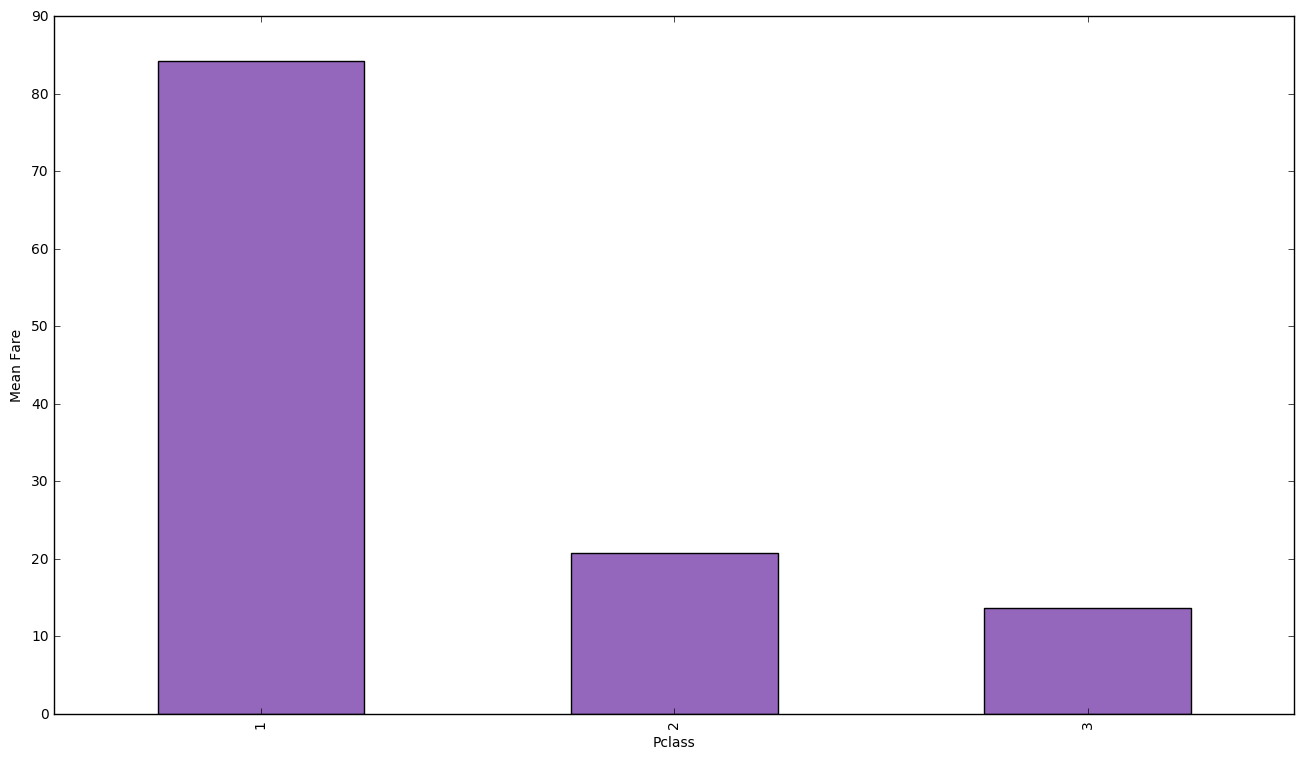

In [11]:
# data_train.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)
plt.figure(figsize=(16, 9))
ax = plt.subplot()
ax.set_ylabel("Mean Fare")
data_train.groupby('Pclass').mean()['Fare'].plot(kind='bar', color=tableau20[8])


Pclass highly correlated with Fare.

([array([ 136.,   87.,  119.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

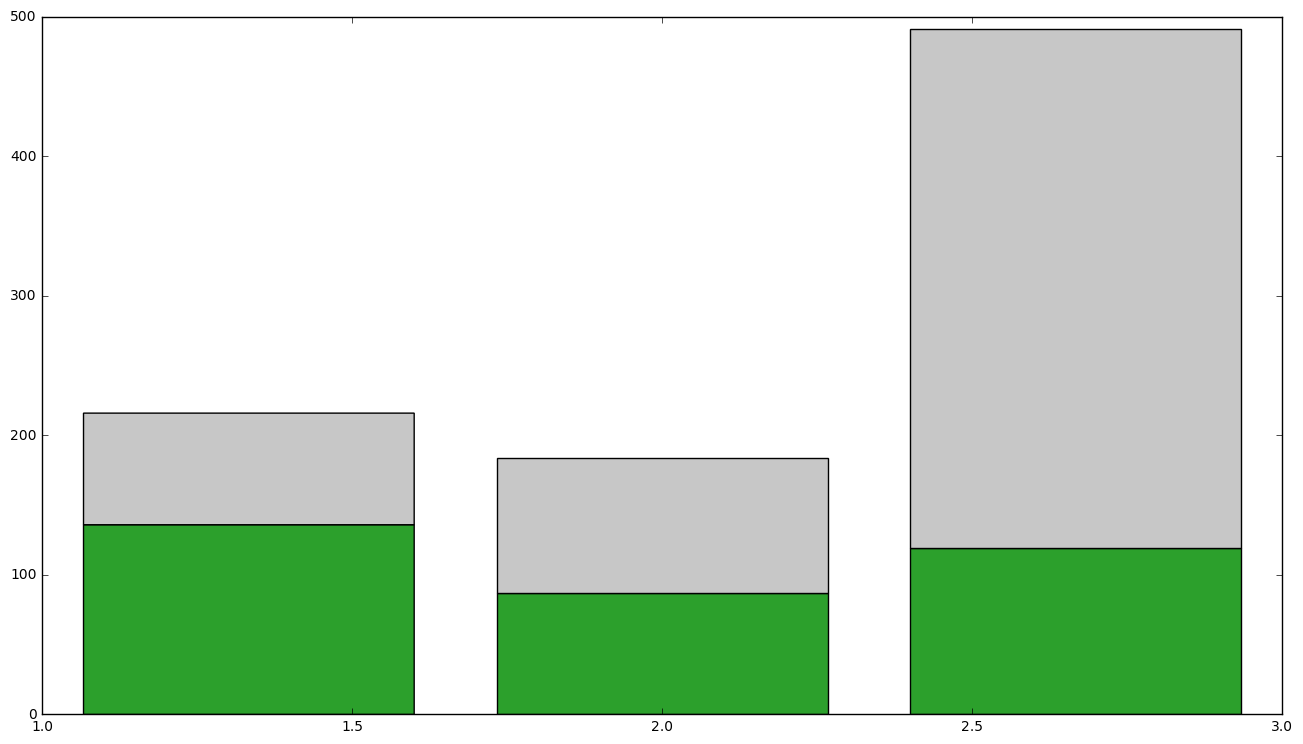

In [12]:
fig = plt.figure(figsize=(16, 9))
plt.hist([data_train[data_train['Survived'] == 1]['Pclass'], data_train[data_train['Survived'] == 0]['Pclass']], stacked=True, color=[tableau20[4], tableau20[15]], bins=3, label = ['Survived','Dead'])


In [13]:
display(data_train_X.head())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
def split_cabin_string(x):
    if type(x) == type('str'):
        return x[0], x[1:]
    else:
        return x, x
    
def preprocess_data(df):
    df.drop(['Name', 'Ticket'], axis=1, inplace=True)
    df['Cabin_1'] = df.apply(lambda row: split_cabin_string(row['Cabin'])[0], axis=1)
    
    pclass_encoded = pd.get_dummies(df['Pclass'], prefix='Pclass')
    sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')
    cabin_encoded = pd.get_dummies(df['Cabin_1'], prefix='Cabin')
    embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embark')
    
    df = df.join(pclass_encoded).join(sex_encoded).join(cabin_encoded).join(embarked_encoded)
    df.drop(['Pclass', 'Sex', 'Cabin', 'Cabin_1', 'Embarked'], axis=1, inplace=True)
    
#     df['Age'].loc[df['Age'].isnull()] = df['Age'].mean()
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].loc[df['Fare'].isnull()] = df['Fare'].mean()
    
    print(df.head())
    return df

In [15]:
data_train_X = preprocess_data(data_train_X)

              Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
PassengerId                                                              
1            22.0      1      0   7.2500         0         0         1   
2            38.0      1      0  71.2833         1         0         0   
3            26.0      0      0   7.9250         0         0         1   
4            35.0      1      0  53.1000         1         0         0   
5            35.0      0      0   8.0500         0         0         1   

             Sex_female  Sex_male  Cabin_A  Cabin_B  Cabin_C  Cabin_D  \
PassengerId                                                             
1                     0         1        0        0        0        0   
2                     1         0        0        0        1        0   
3                     1         0        0        0        0        0   
4                     1         0        0        0        1        0   
5                     0         1        0 

/Users/calvinku/anaconda/envs/kaggle/lib/python2.7/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
print(data_train_X.describe())
print(data_train_X.isnull().sum())

              Age       SibSp       Parch        Fare    Pclass_1    Pclass_2  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean    29.361582    0.523008    0.381594   32.204208    0.242424    0.206510   
std     13.019697    1.102743    0.806057   49.693429    0.428790    0.405028   
min      0.420000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     22.000000    0.000000    0.000000    7.910400    0.000000    0.000000   
50%     28.000000    0.000000    0.000000   14.454200    0.000000    0.000000   
75%     35.000000    1.000000    0.000000   31.000000    0.000000    0.000000   
max     80.000000    8.000000    6.000000  512.329200    1.000000    1.000000   

         Pclass_3  Sex_female    Sex_male     Cabin_A     Cabin_B     Cabin_C  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.551066    0.352413    0.647587    0.016835    0.052750    0.066218   
std      0.497665    0.4779

In [17]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
data_test = preprocess_data(data_test)

              Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
PassengerId                                                              
892          34.5      0      0   7.8292         0         0         1   
893          47.0      1      0   7.0000         0         0         1   
894          62.0      0      0   9.6875         0         1         0   
895          27.0      0      0   8.6625         0         0         1   
896          22.0      1      1  12.2875         0         0         1   

             Sex_female  Sex_male  Cabin_A  Cabin_B  Cabin_C  Cabin_D  \
PassengerId                                                             
892                   0         1        0        0        0        0   
893                   1         0        0        0        0        0   
894                   0         1        0        0        0        0   
895                   0         1        0        0        0        0   
896                   1         0        0 

In [19]:
print(data_test.describe())
print(data_test.isnull().sum())

              Age       SibSp       Parch        Fare    Pclass_1    Pclass_2  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean    29.599282    0.447368    0.392344   35.627188    0.255981    0.222488   
std     12.703770    0.896760    0.981429   55.840500    0.436934    0.416416   
min      0.170000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     23.000000    0.000000    0.000000    7.895800    0.000000    0.000000   
50%     27.000000    0.000000    0.000000   14.454200    0.000000    0.000000   
75%     35.750000    1.000000    0.000000   31.500000    1.000000    0.000000   
max     76.000000    8.000000    9.000000  512.329200    1.000000    1.000000   

         Pclass_3  Sex_female    Sex_male     Cabin_A     Cabin_B     Cabin_C  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.521531    0.363636    0.636364    0.016746    0.043062    0.083732   
std      0.500135    0.4816

In [20]:
data_test.loc[:, 'Cabin_T'] = [0] * len(data_test)

In [21]:
print(data_test.describe())
print(data_test.isnull().sum())

              Age       SibSp       Parch        Fare    Pclass_1    Pclass_2  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean    29.599282    0.447368    0.392344   35.627188    0.255981    0.222488   
std     12.703770    0.896760    0.981429   55.840500    0.436934    0.416416   
min      0.170000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     23.000000    0.000000    0.000000    7.895800    0.000000    0.000000   
50%     27.000000    0.000000    0.000000   14.454200    0.000000    0.000000   
75%     35.750000    1.000000    0.000000   31.500000    1.000000    0.000000   
max     76.000000    8.000000    9.000000  512.329200    1.000000    1.000000   

         Pclass_3  Sex_female    Sex_male     Cabin_A     Cabin_B     Cabin_C  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.521531    0.363636    0.636364    0.016746    0.043062    0.083732   
std      0.500135    0.4816

In [22]:
# cabin_t_idx = data_train_X.columns.get_loc("Cabin_T")
# cols = data_test.columns.tolist()
# cols = cols[:cabin_t_idx] + [cols[cabin_t_idx]] + cols[cabin_t_idx + 1:]
data_test = data_test.reindex(columns=data_train_X.columns)

In [23]:
data_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embark_C,Embark_Q,Embark_S
PassengerId,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,7.8292,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
893,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
894,62.0,0,0,9.6875,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
895,27.0,0,0,8.6625,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
896,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


Quick and dirty random forest

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()
# reg = SVC()
clf = LogisticRegression()
clf_es = GradientBoostingClassifier(max_depth=1, random_state=0)
parameters = {'n_estimators': [16, 64, 128, 512, 1024, 2048], 'learning_rate': [0.1, 0.3, 0.5], 'min_samples_leaf': [1, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 10]}
reg_gs = GridSearchCV(clf_es, parameters, cv=9, n_jobs=-1)
reg_gs.fit(data_train_X, data_train_y)
y_pred = reg_gs.predict(data_test)

print("Training time: {}".format(time.time() - start_time))

Training time: 2058.69558692


In [25]:
print("Best score: {}".format(reg_gs.best_score_))
print("Best params: {}".format(reg_gs.best_params_))

Best score: 0.838383838384
Best params: {'max_features': 'auto', 'n_estimators': 64, 'learning_rate': 0.3, 'max_depth': 10, 'min_samples_leaf': 50}


In [26]:
y_pred = pd.DataFrame(y_pred, index=data_test.index, columns=["Survived"])

In [27]:
y_pred.index.rename("PassengerId", inplace=True)

In [28]:
y_pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [30]:
y_pred.describe()

,Survived
count,418.000000
mean,0.375598
std,0.484857
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
